In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [66]:
fc=45       #MPa
f_t=0.33*np.sqrt(fc) #MPa
ep_c=2*10**(-3)
Ec=40*10**3    #MPa
Es=205000   #MPa
fr=0.6*np.sqrt(fc)
N=0
d=443 #mm
b=300 #mm
As_top=226   #mm2
As_bot=2828  #mm2
h=500  #mm
Ec=29171 #MPa
Itr=3.76*10**9 #mm4
fy=500 #MPa
Mcr1=65 #KNm
Mcr2=161 #KNm


In [67]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'table.csv'

# Read the CSV file
df = pd.read_csv(file_path, encoding='utf-8',header=None)

# Convert the DataFrame to a NumPy array
table = df.to_numpy()


print(table)
alpha1=np.interp((0.1*10**-3)/ep_c,table[0,:],table[1,:])
beta1=np.interp((0.1*10**-3)/ep_c,table[0,:],table[2,:])
print(alpha1,beta1)

[[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
 [0.   0.27 0.52 0.73 0.87 0.89 0.81 0.7  0.6 ]
 [0.67 0.67 0.67 0.69 0.71 0.77 0.84 0.92 1.  ]]
0.054000000000000006 0.67


In [101]:
#N=0
N=0
x=200
list_r=np.arange(0.1,4,0.05)
list_ept=np.arange(0.1,4.05,0.05)*10**-3
#list_ept=[0.01*10**-3]
M0=[]
PHI=[]
X=[]

for ep_t in list_ept:
    r=ep_t/ep_c
    alpha1=np.interp(r,table[0,:],table[1,:])
    beta1=np.interp(r,table[0,:],table[2,:])
    for j in range(250000):
        
                #print(x)
                #ep_t=r*ep_c
                phi=ep_t/x
                ep_steel=-ep_t+phi*d
                sigma_c=f_t/(1+np.sqrt(500*ep_steel))

                N1c=-alpha1*beta1*fc*x*b
                N2c=7.5*30*sigma_c*b
                
                if (-ep_t+phi*(30+12+6))*Es < fy:
                    N3s=(-ep_t+phi*(30+12+6))*Es*As_top
                else :
                    N3s=fy*As_top
                
                if ep_steel*Es<fy :
                    N4s=ep_steel*Es*As_bot
                else :
                    N4s=fy*As_bot
                
                N_tot=(N1c+N2c+N3s+N4s)*10**-3
                
                if N_tot<=N+2 and N_tot>=N-2:
                    #print('done')
                    #print(N_tot)
                    #print(-ep_t+phi*h)
                    break

                else :
                    if N_tot-N>0 :
                        x=x+0.1

                    if N_tot-N<0 :
                        x=x-0.1
                
                if j==249999:
                    print('no x found')
                    #print(N_tot)
    Mo=-N1c*(h/2-(beta1*x)/2)+N4s*((h/2)-30-12-15)+N2c*((h/2)-30-12-15-(7.5*30)/2)-N3s*(h/2-30-12-6) 
    Mo=Mo*10**(-6)#KNm
    if Mo>=Mcr1:
        M0.append(Mo)
        PHI.append(phi*10**6)
    
    X.append(x)
    


In [103]:
#Calcul Elastique 
PHI11=np.arange(0,1.2,0.12)
me=[]
psi_e=[]
for psi in PHI11 :
    m= Ec*Itr*psi*10**-6*10**-6
    
    if m<(Mcr1) :
        psi_e.append(psi)
        me.append(m)
        
    


psi_e.extend(PHI)
me.extend(M0)
#print(psi_e)

561.341717761205


Text(0.5, 1.0, 'Moment-curvature for N=0')

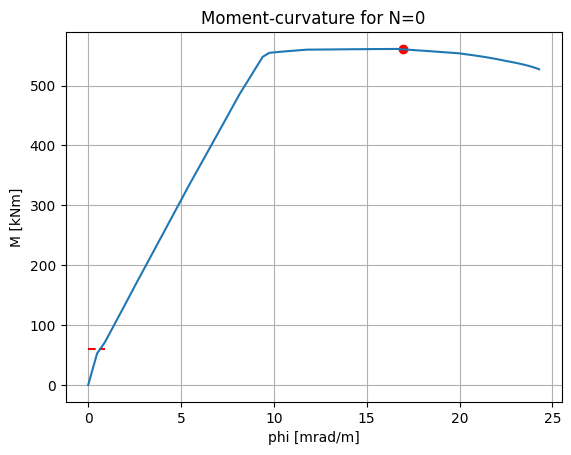

In [104]:



print(np.max(M0))
plt.scatter(PHI[index_max],np.max(M0),c='r')
plt.hlines(60,0,0.9,colors='r',linestyles='dashed')
plt.plot(psi_e,me)
plt.grid(True)
plt.xlabel('phi [mrad/m]')
plt.ylabel('M [kNm]')
plt.title('Moment-curvature for N=0')


In [110]:

N=-1000

x=400
#list_r=np.arange(0.1,4,0.05)
list_ept=np.arange(0.4,4.01,0.05)*10**-3
#list_ept=[0.2*10**-3]
M02=[]
PHI2=[]
X=[]

for ep_t in list_ept:
    r=ep_t/ep_c
    alpha1=np.interp(r,table[0,:],table[1,:])
    beta1=np.interp(r,table[0,:],table[2,:])
    for j in range(10000000):
                #print(x)
                #ep_t=r*ep_c
    
                phi=ep_t/x
                ep_steel=-ep_t+phi*d
                
                
                if x<=h :
                    N1c=-alpha1*beta1*fc*x*b
                else :
                    N1c=-alpha1*beta1*fc*h*b
                
                if ep_steel>0 :
                    sigma_c=f_t/(1+np.sqrt(500*ep_steel))
                    N2c=7.5*30*sigma_c*b
                else :
                    N2c=0 
        
                if (-ep_t+phi*(30+12+6))*Es < fy:
                    N3s=(-ep_t+phi*(30+12+6))*Es*As_top
                else :
                    N3s=fy*As_top
                
                if ep_steel*Es<fy :
                    N4s=ep_steel*Es*As_bot
                else :
                    N4s=fy*As_bot
                
                N_tot=(N1c+N2c+N3s+N4s)*10**-3
                #print(N_tot)
                if N_tot<=N+50 and N_tot>=N-50:
                    #print('done')
                    #print(N_tot)
                    break

                else :
                    if N_tot-N>0 :
                        x=x+0.1

                    if N_tot-N<0 :
                        x=x-0.1
                
                
                if j==9999999:
                    print('no x found')
                    print(N1c)
                    print(x)
    if ep_steel<0 :
        N4s=-N4s
        
    if x<=d :
        Mo=np.abs(N1c)*(h/2-(beta1*x)/2)+(N4s)*((h/2)-30-12-15)+np.abs(N2c)*((h/2)-30-12-15-(7.5*30)/2)+np.abs(N3s)*(h/2-30-12-6) 
        Mo=Mo*10**(-6)#KNm
    else :
        Mo=np.abs(N1c)*(h/2-(beta1*h)/2)+(N4s)*((h/2)-30-12-15)+np.abs(N2c)*((h/2)-30-12-15-(7.5*30)/2)+np.abs(N3s)*(h/2-30-12-6) 
        Mo=Mo*10**(-6)#KNm
    
    
    if Mo>=Mcr2 :
        M02.append(Mo)
        PHI2.append(phi*10**6)
    
    X.append(x)
    
    

In [111]:
#calcul elastique 
PHI22=np.arange(0,1.2,0.12)
me=[]
psi_e=[]
for psi in PHI22 :
    m= Ec*Itr*psi*10**-6*10**-6
    
    if m<(Mcr2) :
        psi_e.append(psi)
        me.append(m)
        
    



psi_e.extend(PHI2)
me.extend(M02)



470.8000000000161


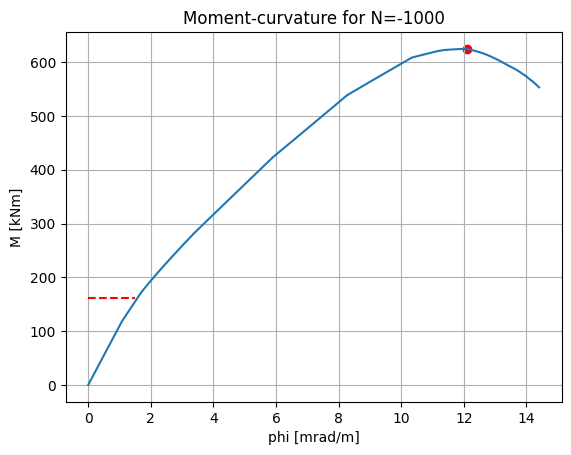

In [112]:

index_max = M02.index(np.max(M02))
plt.scatter(PHI2[index_max],np.max(M02),c='r')
plt.hlines(161,0,1.5,colors='r',linestyles='dashed')
plt.plot(psi_e,me)
print(np.max(X))
plt.xlabel('phi [mrad/m]')
plt.ylabel('M [kNm]')
plt.title('Moment-curvature for N=-1000')
plt.grid(True)


In [87]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = '2000N1.csv'

# Read the CSV file
df = pd.read_csv(file_path, encoding='utf-8',header=None)

# Convert the DataFrame to a NumPy array
resp2N1 = df.to_numpy()


In [88]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = '2000N2.csv'

# Read the CSV file
df = pd.read_csv(file_path, encoding='utf-8',header=None)

# Convert the DataFrame to a NumPy array
resp2N2 = df.to_numpy()

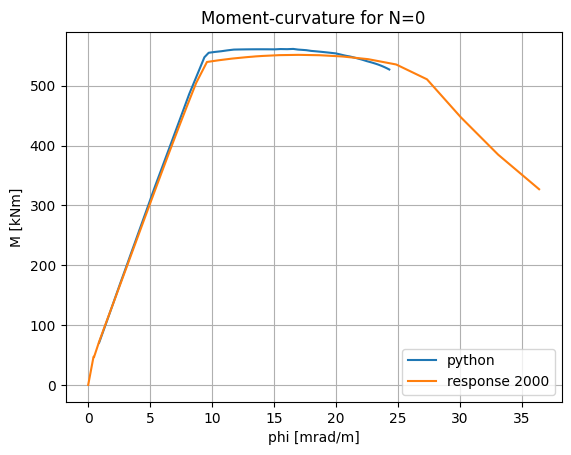

In [89]:
plt.plot(PHI,M0,label='python')
plt.plot(resp2N1[:,0],resp2N1[:,1],label='response 2000')
plt.grid(True)
plt.xlabel('phi [mrad/m]')

plt.ylabel('M [kNm]')
plt.title('Moment-curvature for N=0')
plt.legend()

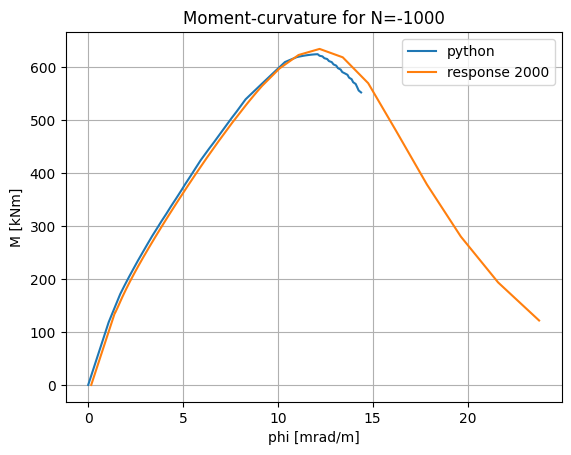

In [90]:

plt.plot(psi_e,me,label='python')
plt.plot(resp2N2[:,0],resp2N2[:,1],label='response 2000')
plt.grid(True)
plt.xlabel('phi [mrad/m]')
plt.ylabel('M [kNm]')
plt.title('Moment-curvature for N=-1000')
plt.legend()
